# Gutenberg books Analysis
Name: Eyal German

Explore the Gutenberg books dataset using various NLP techniques.


## Import Libraries

In [1]:
import os
os.chdir('BigData/Code')
print(os.getcwd())

/sise/home/germane/BigData/Code


In [22]:
import os
import pandas as pd
from tqdm import tqdm
from bert_topic_modeling import run_bertopic_workflow
from metadata_manager import METADATA_PATH, TEXTS_PATH, load_metadata, get_metadata_by_file_id
from matplotlib import pyplot as plt

In [ ]:
import os
os.makedirs("gutenberg_all_books", exist_ok=True)
!wget -r -np -nH --cut-dirs=1 -R "index.html*" -P gutenberg_all_books ftp://mirror.csclub.uwaterloo.ca/gutenberg/


--2025-01-27 21:04:54--  ftp://mirror.csclub.uwaterloo.ca/gutenberg/
           => ‘gutenberg_all_books/.listing’
Resolving mirror.csclub.uwaterloo.ca (mirror.csclub.uwaterloo.ca)... 129.97.134.71, 2620:101:f000:4901:c5c:0:f:1055
Connecting to mirror.csclub.uwaterloo.ca (mirror.csclub.uwaterloo.ca)|129.97.134.71|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /gutenberg ... done.
==> PASV ... done.    ==> LIST ... done.

.listing                [ <=>                ]   5.16K  --.-KB/s    in 0s      

2025-01-27 21:04:56 (32.8 MB/s) - ‘gutenberg_all_books/.listing’ saved [5280]

Removed ‘gutenberg_all_books/.listing’.
--2025-01-27 21:04:56--  ftp://mirror.csclub.uwaterloo.ca/gutenberg/.zcompdump
           => ‘gutenberg_all_books/.zcompdump’
==> CWD not required.
==> PASV ... done.    ==> RETR .zcompdump ... done.
Length: 49348 (48K)

.zcompdump          100%[===================>]  48.19K   108KB/s    in 

In [3]:
import shutil
txt_output_folder = "gutenberg_txt_files"
os.makedirs(txt_output_folder, exist_ok=True)

# Step 4: Walk through all files in the downloaded directory and extract .txt files
for root, dirs, files in os.walk("gutenberg_all_books"):
    for file in files:
        if file.endswith(".txt"):  # Check if the file is a .txt file
            source_path = os.path.join(root, file)
            destination_path = os.path.join(txt_output_folder, file)

            # Copy the .txt file to the output folder
            shutil.copy2(source_path, destination_path)
            print(f"Copied: {source_path} to {destination_path}")

print(f"All .txt files have been extracted to '{txt_output_folder}'!")

Copied: gutenberg_all_books/donate-howto.txt to gutenberg_txt_files/donate-howto.txt
Copied: gutenberg_all_books/0/1/1-0.txt to gutenberg_txt_files/1-0.txt
Copied: gutenberg_all_books/0/1/old/1.txt to gutenberg_txt_files/1.txt
Copied: gutenberg_all_books/0/1/old/all11.txt to gutenberg_txt_files/all11.txt
Copied: gutenberg_all_books/0/1/old/all7011.txt to gutenberg_txt_files/all7011.txt
Copied: gutenberg_all_books/0/1/old/when11.txt to gutenberg_txt_files/when11.txt
Copied: gutenberg_all_books/0/1/old/when12.txt to gutenberg_txt_files/when12.txt
Copied: gutenberg_all_books/0/2/2.txt to gutenberg_txt_files/2.txt
Copied: gutenberg_all_books/0/2/old/bill11.txt to gutenberg_txt_files/bill11.txt
Copied: gutenberg_all_books/0/3/3.txt to gutenberg_txt_files/3.txt
Copied: gutenberg_all_books/0/3/old/jfk11.txt to gutenberg_txt_files/jfk11.txt
Copied: gutenberg_all_books/0/4/4.txt to gutenberg_txt_files/4.txt
Copied: gutenberg_all_books/0/4/old/getty11.txt to gutenberg_txt_files/getty11.txt
Copie

## Data Analysis

In [23]:
def file_len(file_path):
    """ Returns the number of lines in a file. """
    with open(file_path, 'r', encoding='utf-8') as f:
        return sum(1 for _ in f)  # Efficient line counting


metadata_df = load_metadata()

data = {'year': []}

for file in tqdm(os.listdir(TEXTS_PATH)):
    if not file.endswith('.txt'):
        continue
    book_data = get_metadata_by_file_id(file.split('.')[0])
    if book_data.empty:
        continue
    data['year'].append(book_data.year)
    data['length'].append(file_len(os.path.join(TEXTS_PATH, file)))
    df = pd.DataFrame(data)

100%|██████████| 7582/7582 [06:38<00:00, 19.03it/s]


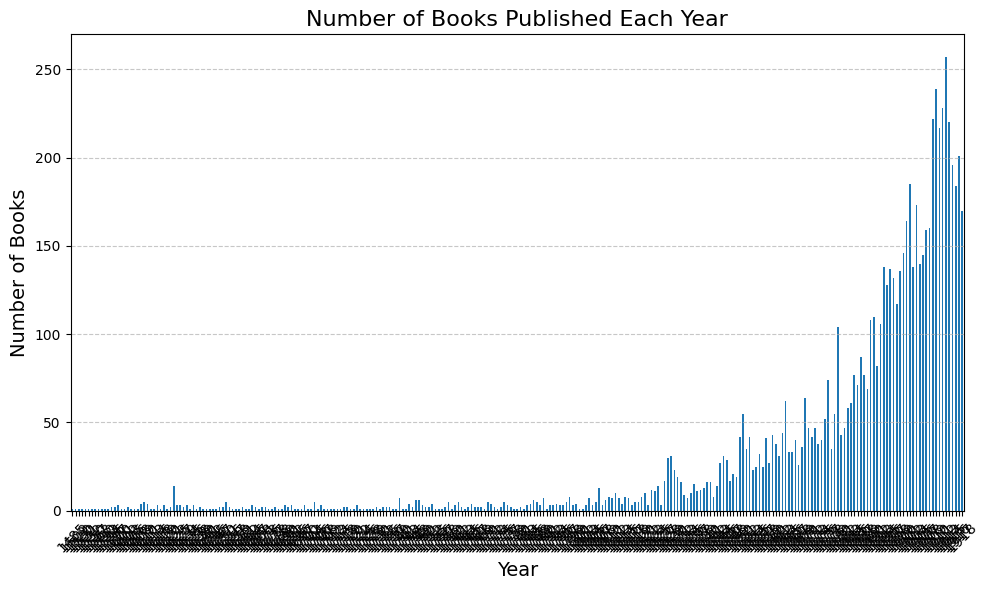

In [26]:
# Group by the 'year' column and count the number of books per year
df = pd.DataFrame(data)
df = df.dropna()
df['year'] = df['year'].astype(int)
books_per_year = df['year'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
books_per_year.plot(kind='bar')
plt.title("Number of Books Published Each Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Books", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

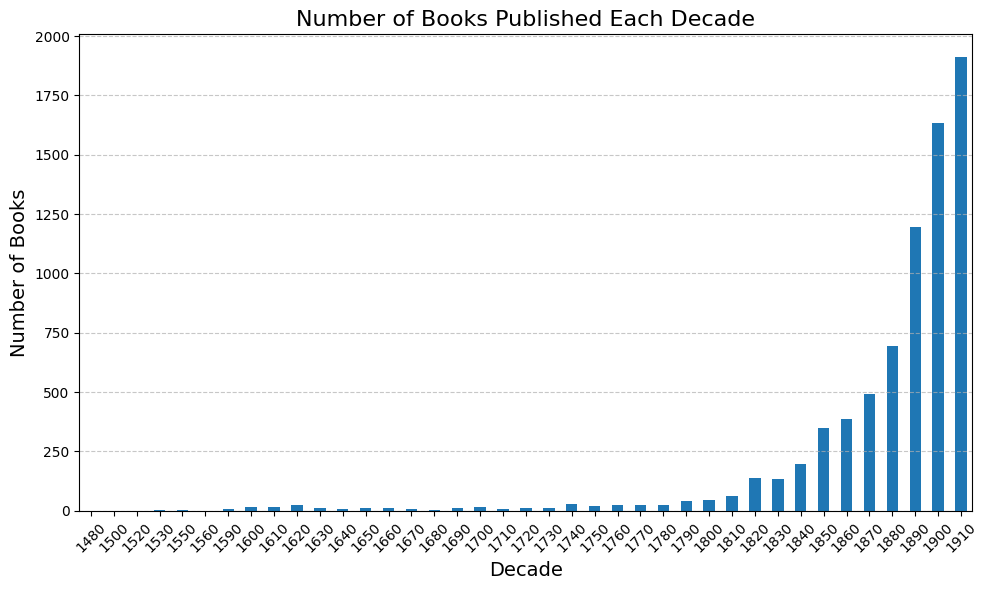

In [27]:
# Create a new column for decades by flooring the year to the nearest decade
df['decade'] = (df['year'] // 10) * 10

# Group by the 'decade' column and count the number of books per decade
books_per_decade = df['decade'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 4))
books_per_decade.plot(kind='bar')
plt.title("Number of Books Published Each Decade", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Number of Books", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Topic Modeling

In [ ]:
folder_path = "results"
os.makedirs(folder_path, exist_ok=True)
run_bertopic_workflow(TEXTS_PATH, folder_path)

## Word Cloud LDA

In [ ]:
from lda_analysis import generate_wordclouds_by_year

folder_path = TEXTS_PATH
folder_result = "results"
output_before_1900 = folder_result + "/wordcloud_before_1900.png"
output_after_1900 = folder_result + "/wordcloud_after_1900.png"
print(folder_path)
generate_wordclouds_by_year(folder_path, output_before_1900=output_before_1900, output_after_1900=output_after_1900)


## Gender Representation in Historical Texts

In [ ]:
from gender_analysis import find_named_entities_in_folder, plot_gender_entities_by_decade, plot_gender_entities_percentage_by_decade

folder_path = "results"
os.makedirs(folder_path, exist_ok=True)
filename = f"{folder_path}/gender_named_entities_gender_spacy.json"
entities_by_decade = find_named_entities_in_folder(TEXTS_PATH, filename)
with open(filename, "r") as file:
    entities_by_decade = json.load(file)
plot_gender_entities_by_decade(entities_by_decade, save_folder=folder_path)
plot_gender_entities_percentage_by_decade(entities_by_decade, save_folder=folder_path)

## Genre classification

In [ ]:
from genre_classification import main

output_dir = "results"
tests_path = TEXTS_PATH
main(tests_path, output_dir, use_existing_data=True)

## Sentiment Analysis

In [ ]:
from sentiment_analysis import find_sentiment_in_folder, plot_sentiment_trends_over_years

folder_path = TEXTS_PATH
output_dir = "results"
timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
kind = "nltk"
df_sentiment = find_sentiment_in_folder(folder_path, kind=kind, output_dir=output_dir)
plot_file = os.path.join(output_dir, f"sentiment_trends_{kind}_{timestamp}.png")
plot_sentiment_trends_over_years(df_sentiment, save_path=plot_file)

kind = "textblob"
df_sentiment = find_sentiment_in_folder(folder_path, kind=kind, output_dir=output_dir)
plot_file = os.path.join(output_dir, f"sentiment_trends_{kind}_{timestamp}.png")
plot_sentiment_trends_over_years(df_sentiment, save_path=plot_file)
